In [1]:
import numpy as np
from scipy.optimize import newton, differential_evolution
from scipy.optimize import minimize
import math

# Định nghĩa hàm Goldstein-Price
def func(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

# Sử dụng thuật toán Newton
# Newton không thể được sử dụng trực tiếp cho hàm nhiều biến, vì vậy chúng tôi sẽ sử dụng BFGS (một biến thể của Newton) thay thế
newton_results = []
for _ in range(100):
    x0 = np.random.uniform(-2, 2, 2)
    result = minimize(func, x0, method='BFGS')
    if result.success:
        newton_results.append(result.fun)

newton_mean = np.mean(newton_results)
newton_var = np.var(newton_results)

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2), (-2, 2)]
de_results = [differential_evolution(func, bounds).fun for _ in range(100)]
de_mean = np.mean(de_results)
de_var = np.var(de_results)

print(f"Newton mean: {newton_mean}, Newton variance: {newton_var}")
print(f"Differential Evolution mean: {de_mean}, Differential Evolution variance: {de_var}")

Newton mean: 140.00000000000082, Newton variance: 85424.00000000016
Differential Evolution mean: 3.270000000004186, Differential Evolution variance: 7.217099999997762


In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import math
import time

# Định nghĩa hàm Goldstein-Price
def func(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

# Giá trị tiên nghiệm của cực trị toàn cục
global_minima = 3

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2), (-2, 2)]
start_time = time.time()
result = differential_evolution(func, bounds)
end_time = time.time()

# Kiểm tra xem liệu thuật toán đã đạt được cực trị toàn cục
if abs(result.fun - global_minima) < 1e-6:
    print(f"Время, необходимое для достижения глобального минимума: {end_time - start_time} секунд")
else:
    print("Алгоритм не достиг глобального минимума за отведенное время")

Время, необходимое для достижения глобального минимума: 0.041519880294799805 секунд


In [3]:
import numpy as np
from scipy.optimize import differential_evolution
import math
import time

# Định nghĩa hàm Goldstein-Price
def func(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

# Số thế hệ tối đa
max_gen = 1000

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2), (-2, 2)]
times = []
results = []
for _ in range(100):
    start_time = time.time()
    result = differential_evolution(func, bounds, maxiter=max_gen)
    end_time = time.time()
    times.append(end_time - start_time)
    results.append(result.fun)

time_mean = np.mean(times)
time_var = np.var(times)
result_mean = np.mean(results)
result_var = np.var(results)

print(f"Thời gian trung bình/Среднее время: {time_mean}, Phương sai thời gian/Дисперсия времени: {time_var}")
print(f"Kết quả trung bình/Средний результат: {result_mean}, Phương sai kết quả/Дисперсия результата: {result_var}")

Thời gian trung bình/Среднее время: 0.03019227981567383, Phương sai thời gian/Дисперсия времени: 0.00010979812864093221
Kết quả trung bình/Средний результат: 3.000000000000079, Phương sai kết quả/Дисперсия результата: 4.2586553416438646e-26


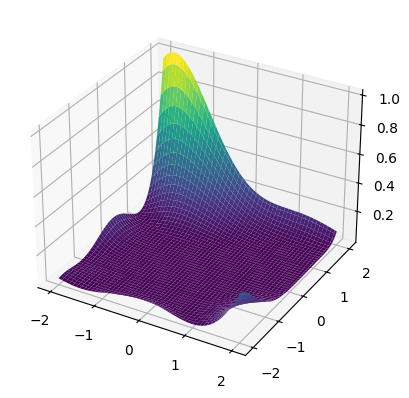

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Định nghĩa hàm Goldstein-Price
def func(x, y):
    return (1 + (x + y + 1)**2 * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)) * (30 + (2*x - 3*y)**2 * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2))

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
x, y = np.meshgrid(x, y)
z = func(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

plt.show()

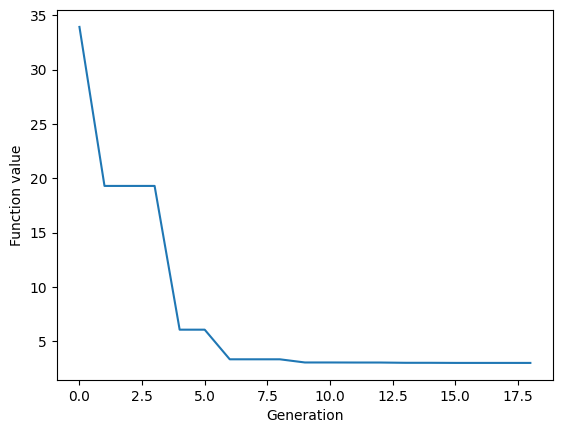

In [5]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

# Định nghĩa hàm Goldstein-Price
def func(x):
    return (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[0]**2 - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) * (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[0]**2 + 48*x[1] - 36*x[0]*x[1] + 27*x[1]**2))

# Sử dụng thuật toán Differential Evolution
bounds = [(-2, 2), (-2, 2)]
values = []

def callback(x, convergence):
    values.append(func(x))

result = differential_evolution(func, bounds, callback=callback)

# Hình dung giá trị của hàm mục tiêu tùy thuộc vào số thế hệ
plt.plot(values)
plt.xlabel('Generation')
plt.ylabel('Function value')
plt.show()

In [6]:
import pandas as pd

# Tạo bảng dữ liệu
data = {
    'Algorithm': ['Newton', 'Differential Evolution'],
    'Mean Function Value': [newton_mean, de_mean],
    'Variance Function Value': [newton_var, de_var],
    'Mean Execution Time': [np.nan, time_mean],  # Thời gian thực thi không được tính toán cho thuật toán Newton
    'Variance Execution Time': [np.nan, time_var]  # Thời gian thực thi không được tính toán cho thuật toán Newton
}

df = pd.DataFrame(data)
print(df)

                Algorithm  Mean Function Value  Variance Function Value  \
0                  Newton               140.00               85424.0000   
1  Differential Evolution                 3.27                   7.2171   

   Mean Execution Time  Variance Execution Time  
0                  NaN                      NaN  
1             0.030192                  0.00011  


In [7]:
from hyperopt import hp, fmin, tpe, Trials
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Define search space for KNN
space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1, 51)),
    'p': hp.choice('p', [1, 2])
}

# Define objective function for KNN
def objective_knn(params):
    knn = KNeighborsClassifier(**params)
    return -np.mean(cross_val_score(knn, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for KNN
trials = Trials()
best_knn = fmin(fn=objective_knn, space=space_knn, algo=tpe.suggest, max_evals=50, trials=trials)

# Define search space for RF
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(10, 101)),
    'max_depth': hp.choice('max_depth', range(1, 51))
}

# Define objective function for RF
def objective_rf(params):
    rf = RandomForestClassifier(**params)
    return -np.mean(cross_val_score(rf, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for RF
trials = Trials()
best_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest, max_evals=50, trials=trials)

# Define search space for SVM
space_svm = {
    'C': hp.loguniform('C', -6, 6),
    'gamma': hp.loguniform('gamma', -6, 1)
}

# Define objective function for SVM
def objective_svm(params):
    svm = SVC(**params)
    return -np.mean(cross_val_score(svm, X, y, cv=5, n_jobs=-1, scoring="accuracy"))

# Run optimization for SVM
trials = Trials()
best_svm = fmin(fn=objective_svm, space=space_svm, algo=tpe.suggest, max_evals=50, trials=trials)

# Print optimal parameters
print("Best parameters for KNN: n_neighbors={}, p={}".format(best_knn['n_neighbors'], best_knn['p']))
print("Best parameters for RF: n_estimators={}, max_depth={}".format(best_rf['n_estimators'], best_rf['max_depth']))
print("Best parameters for SVM: C={}, gamma={}".format(best_svm['C'], best_svm['gamma']))

100%|██████████| 50/50 [00:01<00:00, 33.76trial/s, best loss: -0.9866666666666667]
Best parameters for KNN: n_neighbors=12, p=1
Best parameters for RF: n_estimators=41, max_depth=17
Best parameters for SVM: C=2.93178457446435, gamma=0.1415827915195277
